<a href="https://colab.research.google.com/github/syedanida/Clustering/blob/main/DB_Scan_clustering_using_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.2 MB/s eta 0:00:00
   ━━━━

In [9]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pycaret.clustering import *
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

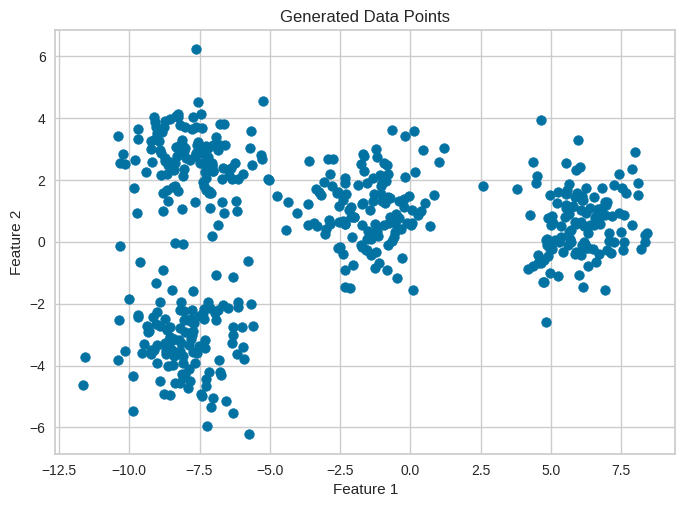

In [2]:
# Step 1: Generate synthetic data for clustering
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.1, random_state=999)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:
# Step 2: Set up PyCaret clustering environment
# normalize=True scales the data for better clustering results
setup_data = setup(data=pd.DataFrame(X, columns=["Feature_1", "Feature_2"]), normalize=True)


,Description,Value
0,Session id,5014
1,Original data shape,"(500, 2)"
2,Transformed data shape,"(500, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [5]:
# Step 3: Create a DBSCAN clustering model
# Adjust 'eps' and 'min_samples' as necessary for your dataset
dbscan_model = create_model('dbscan', eps=0.3, min_samples=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5508,543.0181,4.5647,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
# Step 4: Assign clusters to data points
assignments = assign_model(dbscan_model)
print("Cluster Assignments:")
print(assignments.head())

Cluster Assignments:
   Feature_1  Feature_2    Cluster
0  -7.242037  -5.964569  Cluster 0
1  -6.833505   0.543555  Cluster 1
2   7.057690   0.272666  Cluster 2
3   5.202121   1.244556  Cluster 2
4  -7.281602   1.664505  Cluster 1


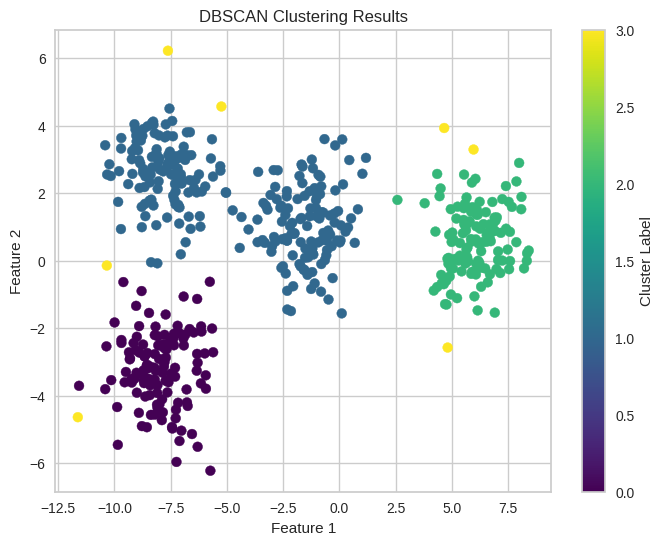

In [8]:
# Step 5: Visualize the clustering results
plt.figure(figsize=(8, 6))
# Convert the 'Cluster' column to numerical labels for color mapping
cluster_labels = assignments['Cluster'].factorize()[0]
plt.scatter(assignments['Feature_1'], assignments['Feature_2'], c=cluster_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [10]:
# Step 6: Compute Silhouette Score and Plot Silhouette Analysis
# Remove outliers (-1 cluster) for silhouette score calculation
filtered_data = assignments[assignments['Cluster'] != -1]
cluster_labels = filtered_data['Cluster']
features = filtered_data[['Feature_1', 'Feature_2']]

In [11]:
# Calculate silhouette score
sil_score = silhouette_score(features, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.53


In [12]:
# Silhouette analysis plot
silhouette_values = silhouette_samples(features, cluster_labels)

In [18]:
# Silhouette analysis plot
plt.figure(figsize=(10, 7))
y_lower = 10  # Starting position for the plot
n_clusters = len(np.unique(cluster_labels))  # Excluding noise (-1)

<Figure size 1000x700 with 0 Axes>

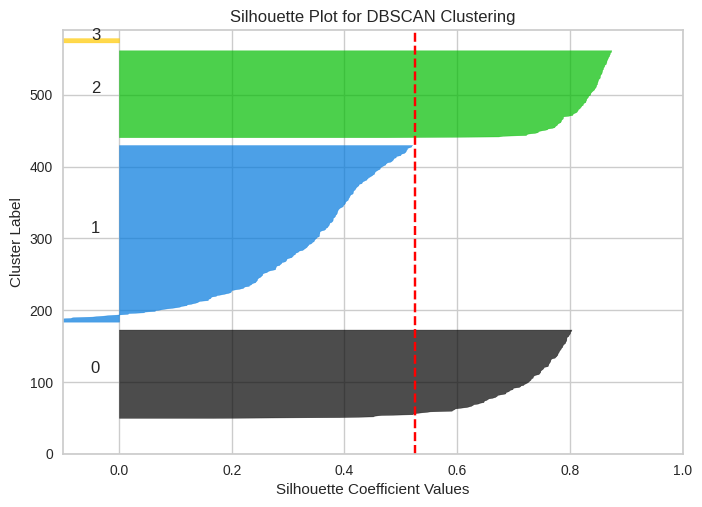

In [21]:
# Loop through clusters
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

# Adjusting limits and adding line for silhouette score
plt.axvline(x=sil_score, color="red", linestyle="--")
plt.title("Silhouette Plot for DBSCAN Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.xlim([-0.1, 1])  # Adjusted x-axis limit for better fit
plt.ylim([0, y_upper + 10])  # Limit for y-axis to fit all clusters properly
plt.show()

In [23]:
# Distribution Plot
print("\nDistribution Plot:")
plot_model(dbscan_model, plot='distribution')


Distribution Plot:
